Bag of words is a special case of Bag of n-grams where n = 1.  
Corpus is a collection of document or a list of strings.

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
v = CountVectorizer(ngram_range=(2,2))
v.fit(['Thor Odinson is looking for a job'])
v.vocabulary_

{'thor odinson': 4,
 'odinson is': 3,
 'is looking': 1,
 'looking for': 2,
 'for job': 0}

In [3]:
corpus = [
    'Thor ate pizza',
    'Loki is tall',
    'Loki is eating pizza'
]

In [7]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [8]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    
    for token in doc:
        if not token.is_stop and not token.is_punct:
            filtered_tokens.append(token.lemma_)

    return ' '.join(filtered_tokens)

In [10]:
preprocess('Thor ate pizza')

'thor eat pizza'

In [12]:
corpus_processed = [preprocess(text) for text in corpus]
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [13]:
vectorizer = CountVectorizer(ngram_range=(1, 2))

vectorizer.fit(corpus_processed)
vectorizer.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [17]:
vectorizer.transform(['Thor eat pizza']).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [20]:
vectorizer.transform(['Hulk eat pizza']).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

<img src='assets/Bags of n grams.png' width=800>

In [21]:
import pandas as pd

In [26]:
df = pd.read_json('assets/news_dataset.json')
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [27]:
df.shape

(12695, 2)

In [28]:
df['category'].value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

In [31]:
min_samples = 1381
df_business = df[df['category'] == 'BUSINESS'].sample(min_samples, random_state=2022)
df_sports = df[df['category'] == 'SPORTS'].sample(min_samples, random_state=2022)
df_crime = df[df['category'] == 'CRIME'].sample(min_samples, random_state=2022)
df_science = df[df['category'] == 'SCIENCE'].sample(min_samples, random_state=2022)

In [34]:
df_balanced = pd.concat([df_business, df_sports, df_crime, df_science], axis=0)
df_balanced.category.value_counts()

category
BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: count, dtype: int64

In [35]:
target = {'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3}
df_balanced['category_num'] = df_balanced.category.map(target)

In [36]:
df_balanced.head()

,text,category,category_num
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['text'], df_balanced['category_num'], 
                                                    test_size=0.2, random_state=2022, stratify=df_balanced.category_num)

In [39]:
X_train.shape, X_test.shape

((4419,), (1105,))

In [40]:
y_train.value_counts()

category_num
3    1105
2    1105
0    1105
1    1104
Name: count, dtype: int64

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

**Note**  
For text based problems, Naive Bayes model is preferred.

In [42]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer()),
    ('Multi NB', MultinomialNB())
])

In [44]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       276
           1       0.93      0.80      0.86       277
           2       0.83      0.90      0.86       276
           3       0.90      0.80      0.85       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [46]:
clf_ngrams = Pipeline([
    ('vectorizer_nbow', CountVectorizer(ngram_range=(1, 2))),
    ('Multi NB', MultinomialNB())
])

In [49]:
clf_ngrams.fit(X_train, y_train)
y_pred = clf_ngrams.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       276
           1       0.95      0.74      0.83       277
           2       0.82      0.88      0.85       276
           3       0.92      0.78      0.84       276

    accuracy                           0.82      1105
   macro avg       0.85      0.82      0.83      1105
weighted avg       0.85      0.82      0.83      1105



In [51]:
X_test[:5]

3716     African Nation Slaps Exxon With Fine Nearly 7 ...
608      These Cringe-Worthy Stories Show It Can Be Har...
11172    LISTEN: The Accidental Discovery That Proved T...
1346     Build Loyalty -- The Cost -- $00.00 Remember y...
1356     Man Killed By Michigan Police Wasn't Targeting...
Name: text, dtype: object

In [52]:
y_test[:5]

3716     0
608      3
11172    3
1346     0
1356     2
Name: category_num, dtype: int64

In [54]:
y_pred[:5]

array([0, 0, 3, 0, 2], dtype=int64)

In [56]:
df_balanced['preprocessed_txt'] = df_balanced['text'].apply(preprocess)

In [57]:
df_balanced.head()

,text,category,category_num,preprocessed_txt
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,GCC Business Leaders remain Confident Face Reg...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review employee wake morning love impor...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment ceo FreshBooks Talks give build...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,Leverage intuition decision making feel safe r...


In [58]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced['preprocessed_txt'],
                                                   df_balanced['category_num'], test_size=0.2,
                                                   random_state=2022, stratify=df_balanced['category_num'])

In [59]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       276
           1       0.92      0.82      0.87       277
           2       0.83      0.92      0.87       276
           3       0.90      0.81      0.85       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



In [61]:
!pip install --quiet matplotlib
!pip install --quiet seaborn

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

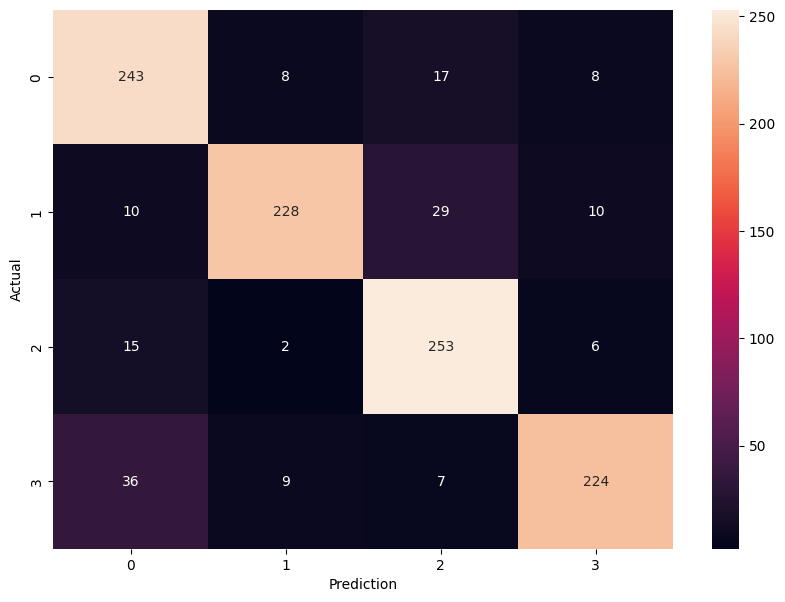

In [63]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

plt.show()